<a href="https://colab.research.google.com/github/tshewanglhaden/Emotion-recognition-from-audio/blob/main/SER_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading the Ravdess audio dataset
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pydub

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pylab as plt
import IPython.display as ipd
import librosa.display
from pydub import AudioSegment
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

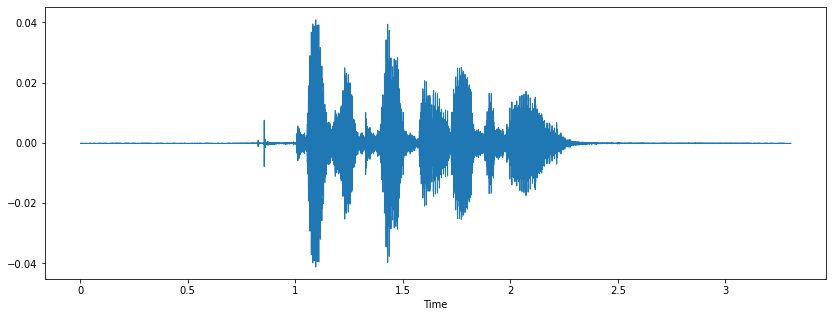

In [ ]:
#example of one audio sound 
import IPython.display as ipd
file_name = '/content/drive/MyDrive/speech emotion/Actor_01/03-01-01-01-01-01-01.wav'
data, sampling_rate = librosa.load(file_name)
plt.figure(figsize=(14,5))
librosa.display.waveshow(data, sr=sampling_rate)
ipd.Audio(file_name)

In [ ]:
sampling_rate

22050

In [ ]:
data

array([ 1.5591205e-07, -1.5845627e-07,  1.5362870e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
#Feature extraction
def extract_feature(file_name,mfcc,chroma,mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
       stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
       mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
       result=np.hstack((result,mfccs))
    if chroma:
       chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
       result=np.hstack((result,chroma))
    if mel:
       mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
       result=np.hstack((result,mel))
    return result

emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
  }



In [ ]:
#emotions to observe
observed_emotions=['calm','happy','fearful','disgust']
#loading data and extracting features for each sound file
def load_data(test_size=0.2):
  x,y=[],[]
  for file in glob.glob("/content/drive/MyDrive/speech emotion/*/*.wav"):
    file_name=os.path.basename(file)
    #converting stereo audio to mono
    sound = AudioSegment.from_wav(file)
    sound = sound.set_channels(1)
    sound.export(file, format="wav")
    emotion= emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
      continue
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)
  return train_test_split(np.array(x),y,test_size=test_size,random_state=9)

#Splitting the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

#getting the shape of the training and testing datasets
print((x_train.shape[0],x_test.shape[0]))

#Getting the number of features extracted
print(f'Features extracted:{x_train.shape[1]}')

#initializing the Multilayer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive',max_iter=500)

#Training the model
model.fit(x_train,y_train)




(576, 192)
Features extracted:180


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#predicting for the test set
y_pred=model.predict(x_test)

#calculating the accuracy of the model
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)

#printing the accuracy
print("Accuracy:{:.2f}%".format(accuracy*100))
print(y_pred)

Accuracy:76.56%
['calm' 'calm' 'calm' 'calm' 'fearful' 'calm' 'happy' 'fearful' 'disgust'
 'fearful' 'happy' 'fearful' 'happy' 'fearful' 'fearful' 'fearful' 'calm'
 'happy' 'disgust' 'disgust' 'calm' 'disgust' 'fearful' 'calm' 'happy'
 'happy' 'disgust' 'calm' 'calm' 'disgust' 'fearful' 'happy' 'calm'
 'fearful' 'fearful' 'happy' 'calm' 'fearful' 'calm' 'happy' 'fearful'
 'happy' 'calm' 'happy' 'fearful' 'fearful' 'disgust' 'disgust' 'calm'
 'fearful' 'disgust' 'disgust' 'fearful' 'fearful' 'calm' 'happy'
 'disgust' 'calm' 'calm' 'calm' 'happy' 'calm' 'disgust' 'disgust' 'happy'
 'calm' 'happy' 'fearful' 'disgust' 'happy' 'fearful' 'fearful' 'disgust'
 'happy' 'disgust' 'disgust' 'fearful' 'calm' 'happy' 'happy' 'disgust'
 'happy' 'calm' 'calm' 'fearful' 'happy' 'happy' 'calm' 'calm' 'fearful'
 'fearful' 'fearful' 'happy' 'disgust' 'disgust' 'calm' 'happy' 'calm'
 'calm' 'happy' 'happy' 'fearful' 'fearful' 'disgust' 'disgust' 'calm'
 'disgust' 'happy' 'happy' 'happy' 'happy' 'calm' 'ca

In [ ]:
!pip install pydub

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pylab as plt
import IPython.display as ipd
import librosa.display
from time import sleep
from pydub import AudioSegment
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def extract_feature(file_name,mfcc,chroma,mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate=sound_file.samplerate
    if chroma:
       stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
       mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
       result=np.hstack((result,mfccs))
    if chroma:
       chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
       result=np.hstack((result,chroma))
    if mel:
       mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
       result=np.hstack((result,mel))
    return result

emotions={
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
  }
#emotions to observe
observed_emotions=['calm','happy','fearful','disgust']
#loading data and extracting features for each sound file
def load_data(test_size=0.2):
  x,y=[],[]
  for file in glob.glob("/content/drive/MyDrive/speech emotion/*/*.wav"):
    file_name=os.path.basename(file)
    #converting stereo audio to mono
    sound = AudioSegment.from_wav(file)
    sound = sound.set_channels(1)
    sound.export(file, format="wav")
    emotion= emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
      continue
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)
  return train_test_split(np.array(x),y,test_size=test_size,random_state=9)


#uploading input file and prediction emotion of the input file
file='/content/drive/MyDrive/speech emotion/Actor_10/03-01-02-02-02-02-10.wav'
feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
#splitting the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

#initializing the Multilayer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive',max_iter=500)

#Training the model
model.fit(x_train,y_train)

#predicting for the test set
y_pred=model.predict(x_test)
y_pre=model.predict([feature])
print(y_pre)


[[-4.62711578e+02  5.06259117e+01 -1.24966478e+01 ...  1.92176976e-05
   2.05226252e-06  1.25694264e-08]
 [-5.19633179e+02  4.22719955e+01 -3.00999413e+01 ...  1.02842307e-06
   7.73281812e-08  9.28530763e-09]
 [-7.31488220e+02  7.09136353e+01  6.48943996e+00 ...  1.38770551e-08
   6.46743903e-09  6.64575506e-09]
 ...
 [-5.63049133e+02  5.55375175e+01 -7.87188721e+00 ...  2.31949025e-06
   2.29302543e-07  1.07381526e-08]
 [-5.67803345e+02  5.47406387e+01 -1.46582432e+01 ...  6.49752474e-06
   6.06782919e-07  9.33353395e-09]
 [-5.68233093e+02  5.65853577e+01 -2.38795733e+00 ...  1.73718377e-06
   1.90041362e-07  9.82760540e-09]]
[[-6.71109924e+02  5.83208885e+01  4.47885418e+00 ...  1.69610672e-07
   1.46834660e-08  6.72479983e-09]
 [-7.79144653e+02  8.62635117e+01  9.49332905e+00 ...  8.52666737e-09
   7.22296667e-09  7.09367320e-09]
 [-7.21000916e+02  6.79046631e+01 -2.13435674e+00 ...  5.35853175e-08
   7.60693464e-09  5.23668886e-09]
 ...
 [-5.74662415e+02  6.40889130e+01 -1.5850591